# Some explorative data analysis

In [1]:
from AI_WQ_package import retrieve_training_data
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
import xarray as xr

%load_ext autoreload
%autoreload 2

## Download data

In [50]:
folder = 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data'
tas_list = []
for i in range(2004,2024):
    tas_list.append(retrieve_training_data.retrieve_annual_training_data(i,'tas','NegF8LfwK',folder))


File '/training_data/tas_sevenday_WEEKLYMEAN_2004.nc' has been downloaded to successfully to 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/tas_sevenday_WEEKLYMEAN_2004.nc'.
File '/training_data/tas_sevenday_WEEKLYMEAN_2005.nc' has been downloaded to successfully to 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/tas_sevenday_WEEKLYMEAN_2005.nc'.
File '/training_data/tas_sevenday_WEEKLYMEAN_2006.nc' has been downloaded to successfully to 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/tas_sevenday_WEEKLYMEAN_2006.nc'.
File '/training_data/tas_sevenday_WEEKLYMEAN_2007.nc' has been downloaded to successfully to 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/tas_sevenday_WEEKLYMEAN_2007.nc'.


In [51]:
mslp_list = []
for i in range(2004,2024):
    mslp_list.append(retrieve_training_data.retrieve_annual_training_data(i,'mslp','NegF8LfwK',folder))

File '/training_data/mslp_sevenday_WEEKLYMEAN_2004.nc' has been downloaded to successfully to 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/mslp_sevenday_WEEKLYMEAN_2004.nc'.
File '/training_data/mslp_sevenday_WEEKLYMEAN_2005.nc' has been downloaded to successfully to 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/mslp_sevenday_WEEKLYMEAN_2005.nc'.
File '/training_data/mslp_sevenday_WEEKLYMEAN_2006.nc' has been downloaded to successfully to 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/mslp_sevenday_WEEKLYMEAN_2006.nc'.
File '/training_data/mslp_sevenday_WEEKLYMEAN_2007.nc' has been downloaded to successfully to 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/mslp_sevenday_WEEKLYMEAN_20

In [52]:
pr_list = []
for i in range(2004,2024):
    pr_list.append(retrieve_training_data.retrieve_annual_training_data(i,'pr','NegF8LfwK',folder))

File '/training_data/pr_sevenday_WEEKLYSUM_2004.nc' has been downloaded to successfully to 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/pr_sevenday_WEEKLYSUM_2004.nc'.
File '/training_data/pr_sevenday_WEEKLYSUM_2005.nc' has been downloaded to successfully to 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/pr_sevenday_WEEKLYSUM_2005.nc'.
File '/training_data/pr_sevenday_WEEKLYSUM_2006.nc' has been downloaded to successfully to 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/pr_sevenday_WEEKLYSUM_2006.nc'.
File '/training_data/pr_sevenday_WEEKLYSUM_2007.nc' has been downloaded to successfully to 'C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/pr_sevenday_WEEKLYSUM_2007.nc'.
File '/training_

## Some explorative data analysis

In [53]:
tas = xr.merge(tas_list)

In [54]:
pr = xr.merge(pr_list)

In [55]:
mslp = xr.merge(mslp_list)


In [56]:
tas.to_netcdf("C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/tas_data_2004-2024.nc")
pr.to_netcdf("C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/pr_data_2004-2024.nc")
mslp.to_netcdf("C:/Users/Anwender/Documents/GitHub/RiVaPy_development/AIWeatherQuestECMWF/RheinMain-Rainmakers/TimeSeriesTransformer/data/mslp_data_2004-2024.nc")

In [2]:
tas = xr.open_dataset("tas_data_2014-2024.nc")
pr = xr.open_dataset("pr_data_2014-2024.nc")
mslp = xr.open_dataset("mslp_data_2014-2024.nc")

In [83]:
tas.tas
# Compute the temporal minimum:
tas.tas.min(dim="time")
# Compute the spatial sum:
tas.tas.sum(dim=["latitude", "longitude"])
# Compute the temporal median:
tas.tas.median(dim="time")
# Compute the mean T:
tas.tas.mean()


<xarray.DataArray 'tas' ()> Size: 4B
array(278.80432, dtype=float32)

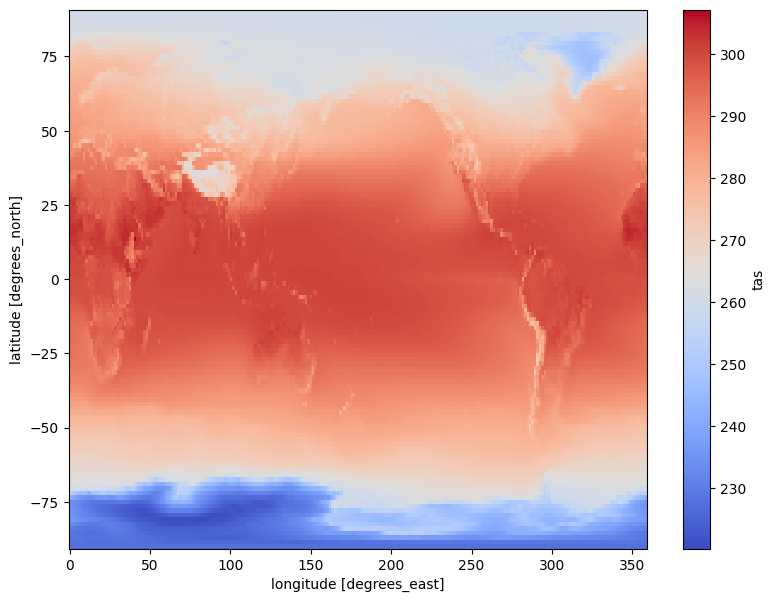

In [84]:
# Note how we chain the mean() and plot() methods, which get executed from left to right
tas.tas.mean(dim="time").plot(size=7, cmap="coolwarm")

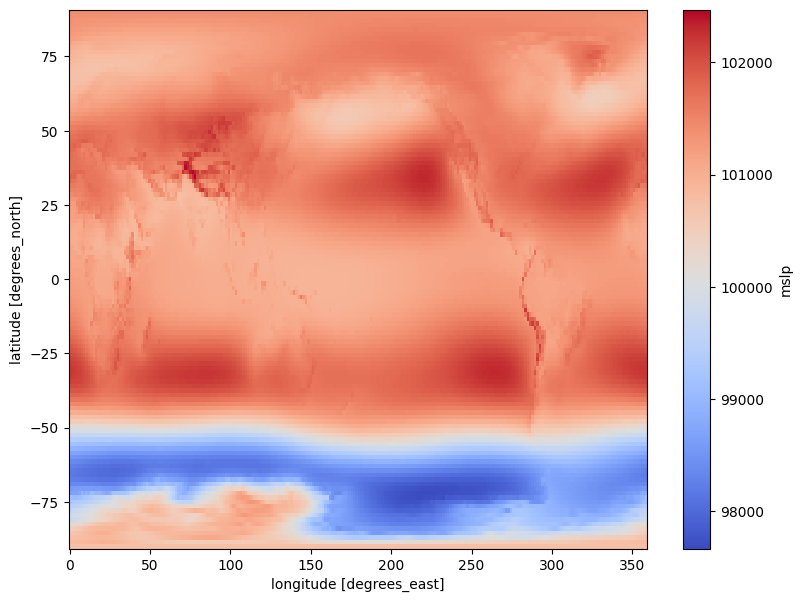

In [8]:
# Note how we chain the mean() and plot() methods, which get executed from left to right
mslp.mslp.mean(dim="time").plot(size=7, cmap="coolwarm")

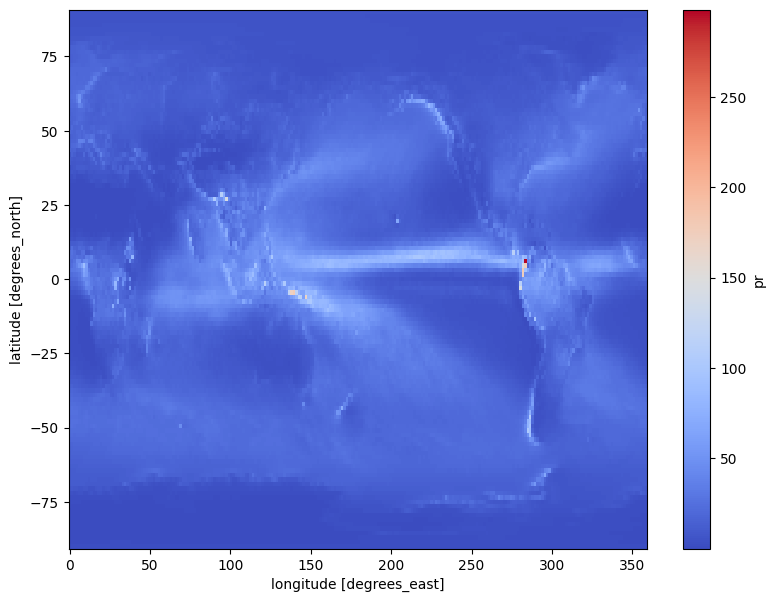

In [9]:
# Note how we chain the mean() and plot() methods, which get executed from left to right
pr.pr.mean(dim="time").plot(size=7, cmap="coolwarm")

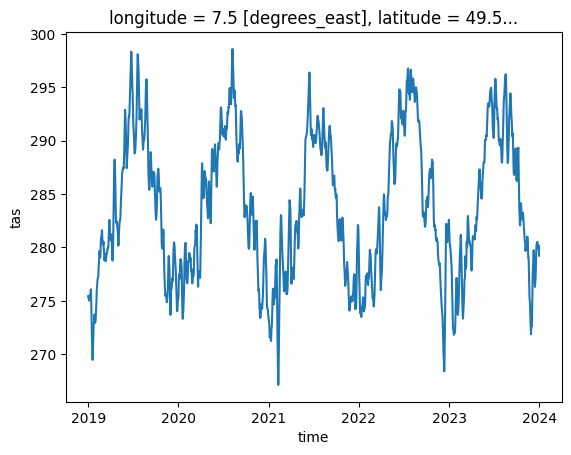

In [10]:
tas.tas.sel(
    longitude=7, latitude=50, method="nearest"
).plot()

In [88]:
tas.tas.groupby(["time.week","time.year"])

c:\Users\Anwender\.conda\envs\AIWeatherQuest\Lib\site-packages\xarray\core\dataset_utils.py:86: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  data = getattr(ref_var.dt, var_name).data


<DataArrayGroupBy, grouped over 2 grouper(s), 265 groups in total:
    'week': 53/53 groups present with labels 1, 2, 3, 4, 5, 6, ..., 49, 50, 51, 52, 53
    'year': 5/5 groups present with labels 2019, 2020, 2021, 2022, 2023>

In [80]:
# Compute the climatlogy:
tos_clim = tas.tas.groupby("time.week").mean()
tos_clim.sel(longitude=7, latitude=50, method="nearest").plot()

AttributeError: 'numpy.ndarray' object has no attribute 'tas'

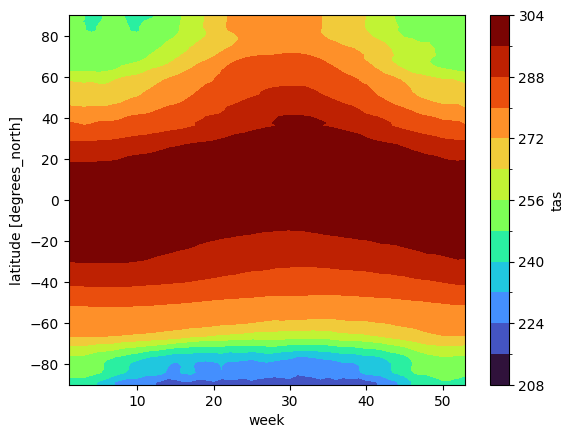

In [13]:
# We can now add a spatial dimension to this plot and look at the zonal mean climatology:
tos_clim.mean(dim="longitude").transpose().plot.contourf(levels=12, cmap="turbo")

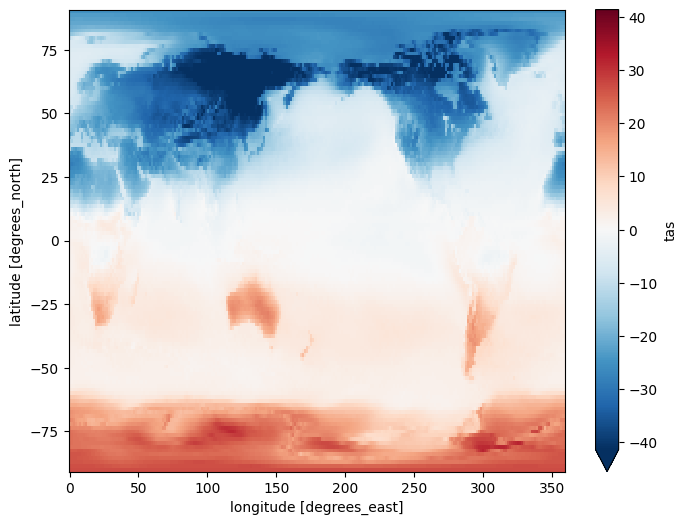

In [14]:
#This gives us helpful information about the mean for each month, 
# but it’s difficult to asses the range of monthly temperatures throughout the year using this plot.
# To better represent the range, we can calculate and plot the difference between January and July climatologies:
(tos_clim.sel(week=1) - tos_clim.sel(week=26)).plot(size=6, robust=True)

c:\Users\Anwender\.conda\envs\AIWeatherQuest\Lib\site-packages\xarray\core\dataset_utils.py:86: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  data = getattr(ref_var.dt, var_name).data


Text(0, 0.5, 'tos anomaly')

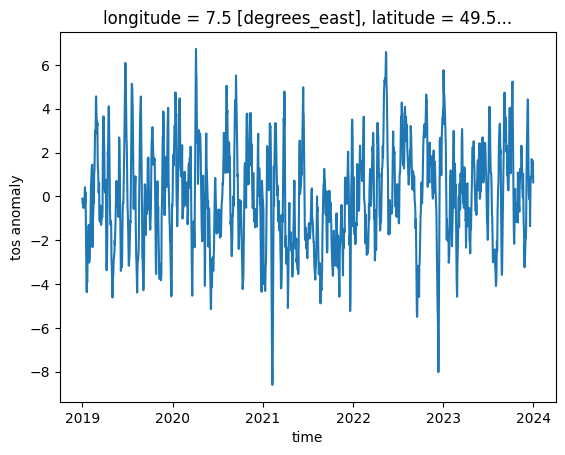

In [15]:
#We’ll compute the climatology using xarray’s .groupby() operation to split the data by month. 
# Then, we’ll remove this climatology from our original data to find the anomaly:
# group all data by month
gb = tas.tas.groupby("time.week")

# take the mean over time to get monthly averages
tos_clim = gb.mean(dim="time")

# subtract this mean from all data of the same month
tos_anom = gb - tos_clim

tos_anom.sel(longitude=7, latitude=50, method="nearest").plot()
plt.ylabel("tos anomaly")

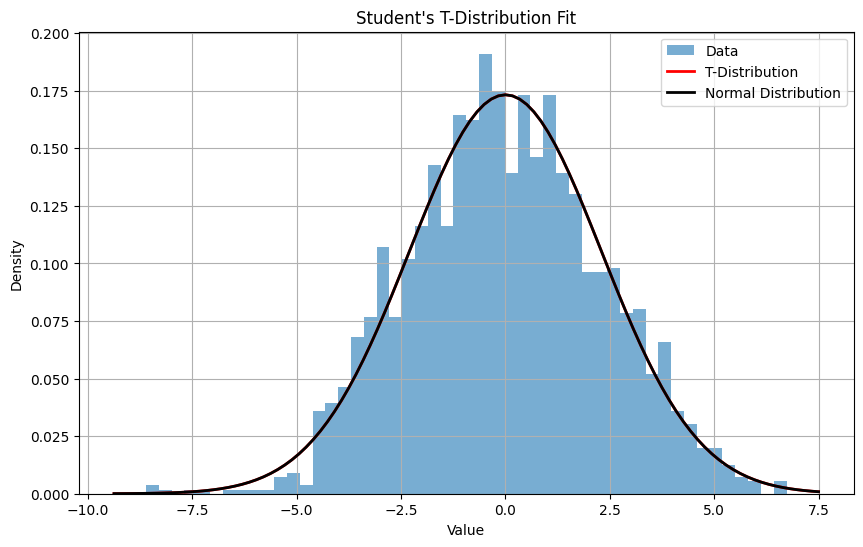

In [16]:
from scipy import stats
from scipy.stats import norm

data = tos_anom.sel(longitude=7, latitude=50, method="nearest")
# Fit the t-distribution to the data
params = stats.t.fit(data)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.6, label='Data')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

pdf_fitted = stats.t.pdf(x, *params)

plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'T-Distribution')
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Student\'s T-Distribution Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('t_distribution_plot.png')

c:\Users\Anwender\.conda\envs\AIWeatherQuest\Lib\site-packages\xarray\core\dataset_utils.py:86: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  data = getattr(ref_var.dt, var_name).data


Text(0, 0.5, 'tos anomaly')

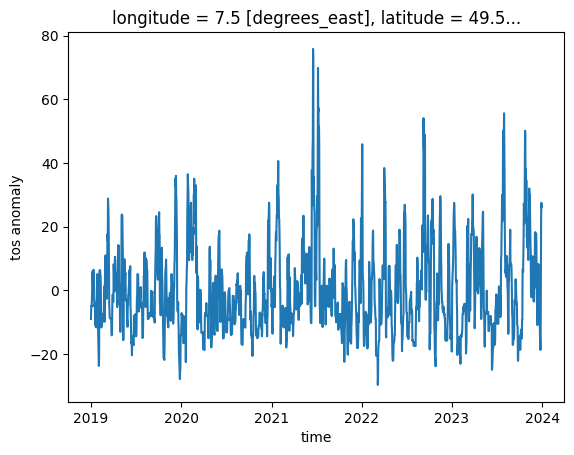

In [17]:
#We’ll compute the climatology using xarray’s .groupby() operation to split the data by month. 
# Then, we’ll remove this climatology from our original data to find the anomaly:
# group all data by month
gb = pr.pr.groupby("time.week")

# take the mean over time to get monthly averages
pr_clim = gb.mean(dim="time")

# subtract this mean from all data of the same month
pr_anom = gb - pr_clim

pr_anom.sel(longitude=7, latitude=50, method="nearest").plot()
plt.ylabel("tos anomaly")

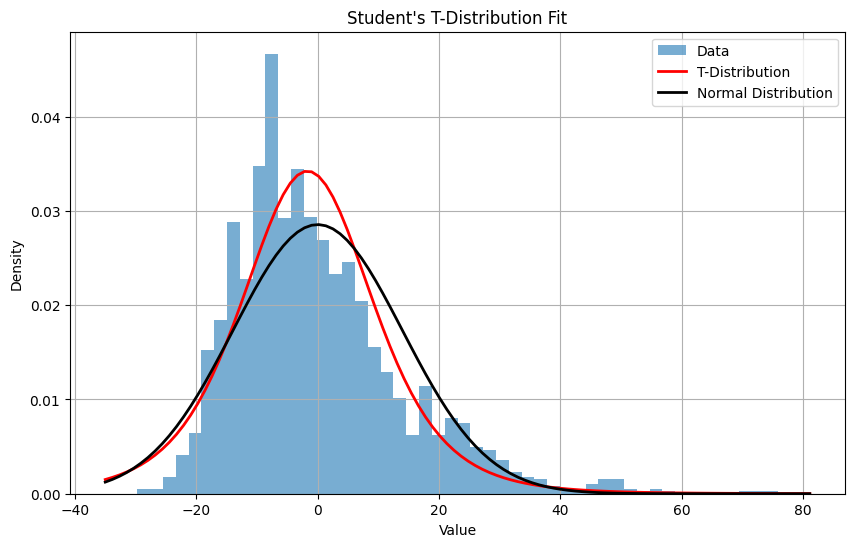

In [18]:
from scipy import stats
# Fit the t-distribution to the data
data = pr_anom.sel(longitude=7, latitude=50, method="nearest")
params = stats.t.fit(data)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.6, label='Data')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

pdf_fitted = stats.t.pdf(x, *params)

plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'T-Distribution')
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Student\'s T-Distribution Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('t_distribution_plot.png')

c:\Users\Anwender\.conda\envs\AIWeatherQuest\Lib\site-packages\xarray\core\dataset_utils.py:86: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  data = getattr(ref_var.dt, var_name).data


Text(0, 0.5, 'tos anomaly')

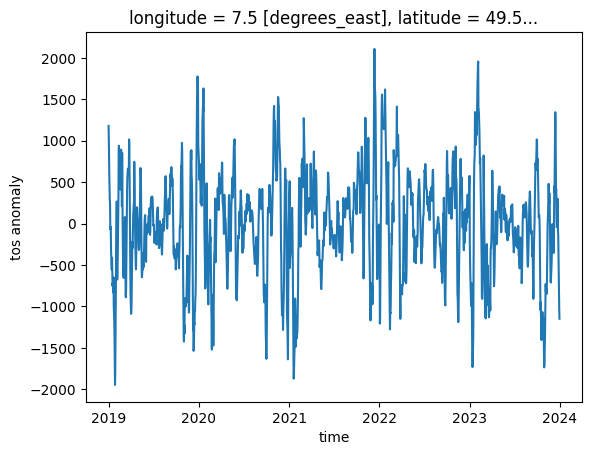

In [19]:
#We’ll compute the climatology using xarray’s .groupby() operation to split the data by month. 
# Then, we’ll remove this climatology from our original data to find the anomaly:
# group all data by month
gb = mslp.mslp.groupby("time.week")

# take the mean over time to get monthly averages
mslp_clim = gb.mean(dim="time")

# subtract this mean from all data of the same month
mslp_anom = gb - mslp_clim

mslp_anom.sel(longitude=7, latitude=50, method="nearest").plot()
plt.ylabel("tos anomaly")

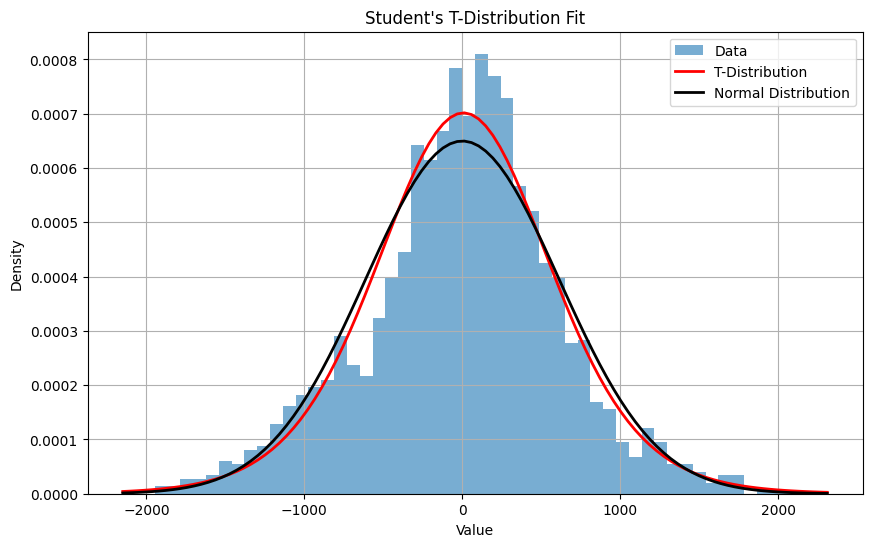

In [20]:
from scipy import stats
# Fit the t-distribution to the data
data = mslp_anom.sel(longitude=7, latitude=50, method="nearest")
params = stats.t.fit(data)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.6, label='Data')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

pdf_fitted = stats.t.pdf(x, *params)

plt.plot(x, pdf_fitted, 'r-', lw=2, label=f'T-Distribution')
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Student\'s T-Distribution Fit')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('t_distribution_plot.png')

In [22]:
tos_anom

<xarray.DataArray 'tas' (time: 1826, latitude: 121, longitude: 240)> Size: 212MB
array([[[-1.1754150e+00, -1.1754150e+00, -1.1754150e+00, ...,
         -1.1754150e+00, -1.1754150e+00, -1.1754150e+00],
        [-8.0894470e-01, -8.0555725e-01, -8.0200195e-01, ...,
         -9.0327454e-01, -8.7239075e-01, -8.4075928e-01],
        [-2.9074707e+00, -2.6956940e+00, -2.4817352e+00, ...,
         -3.4436340e+00, -3.2681732e+00, -3.0889282e+00],
        ...,
        [ 3.4970093e-01,  3.6761475e-01,  3.8450623e-01, ...,
          2.8210449e-01,  3.0586243e-01,  3.2838440e-01],
        [-5.7656860e-01, -5.5706787e-01, -5.3779602e-01, ...,
         -6.2281799e-01, -6.0737610e-01, -5.9175110e-01],
        [-7.9757690e-02, -7.9757690e-02, -7.9757690e-02, ...,
         -7.9757690e-02, -7.9757690e-02, -7.9757690e-02]],

       [[-1.7935944e+00, -1.7935944e+00, -1.7935944e+00, ...,
         -1.7935944e+00, -1.7935944e+00, -1.7935944e+00],
        [-1.6036835e+00, -1.6009216e+00, -1.5977020e+00, ...,
         -1.6825256e+00, -1.6570740e+00, -1.6305389e+00],
        [-3.9546356e+00, -3.7560425e+00, -3.5545044e+00, ...,
         -4.3685303e+00, -4.2344208e+00, -4.0961304e+00],
...
         -1.3762512e+00, -1.3888397e+00, -1.4011383e+00],
        [-1.1461029e+00, -1.1607819e+00, -1.1742859e+00, ...,
         -1.1013641e+00, -1.1166077e+00, -1.1319275e+00],
        [ 6.2895203e-01,  6.2895203e-01,  6.2895203e-01, ...,
          6.2895203e-01,  6.2895203e-01,  6.2895203e-01]],

       [[-4.3967285e+00, -4.3967285e+00, -4.3967285e+00, ...,
         -4.3967285e+00, -4.3967285e+00, -4.3967285e+00],
        [-5.9339294e+00, -5.9492645e+00, -5.9636688e+00, ...,
         -5.8968964e+00, -5.9095306e+00, -5.9220581e+00],
        [-6.2441406e+00, -6.2046051e+00, -6.1645966e+00, ...,
         -6.3432922e+00, -6.3113251e+00, -6.2781830e+00],
        ...,
        [-1.4997101e+00, -1.5149231e+00, -1.5298767e+00, ...,
         -1.4338837e+00, -1.4563141e+00, -1.4781647e+00],
        [-1.1104736e+00, -1.1268921e+00, -1.1421509e+00, ...,
         -1.0643463e+00, -1.0800781e+00, -1.0958710e+00],
        [ 5.8477783e-01,  5.8477783e-01,  5.8477783e-01, ...,
          5.8477783e-01,  5.8477783e-01,  5.8477783e-01]]],
      shape=(1826, 121, 240), dtype=float32)
Coordinates:
  * longitude  (longitude) float64 2kB 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * latitude   (latitude) float64 968B 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * time       (time) datetime64[ns] 15kB 2019-01-01 2019-01-02 ... 2023-12-31
    week       (time) int64 15kB 1 1 1 1 1 1 2 2 2 ... 51 52 52 52 52 52 52 52

## EOF Analysis


In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path
sst = tas['tas'][:-365]

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(sst.coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)
eofs = solver.eofs(neofs=1)

reconstructed_data = solver.reconstructedField(1)



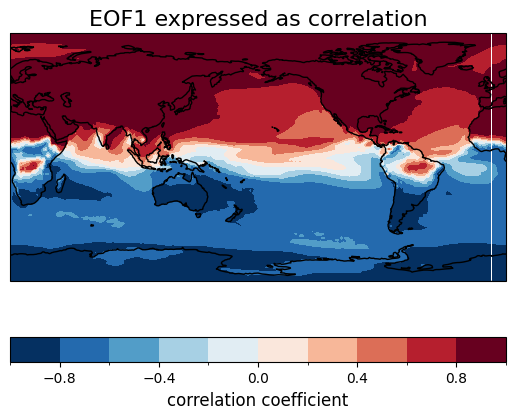

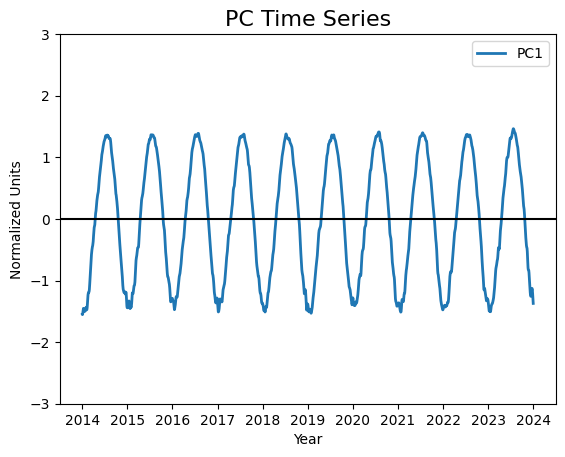

In [8]:
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
ax.coastlines()
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)



# Plot the leading PC time series.
plt.figure()
for i in range(1):
    pc1[:, i].plot(linewidth=2,label='PC'+str(i+1))
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC Time Series', fontsize=16)
ax.legend()

plt.show()

In [9]:
from eofs.multivariate.standard import MultivariateEof

In [10]:
msolver = MultivariateEof([np.array(tas['tas'][:-365]),np.array(mslp['mslp'][:-365]),np.array(pr['pr'][:-365])])
eofs_data1, eofs_data2, eofs_data3 = msolver.eofs(neofs=1)

In [11]:
pcs = msolver.pcs(npcs=1, pcscaling=1)

Text(0.5, 1.0, 'EOF1 expressed as covariance')

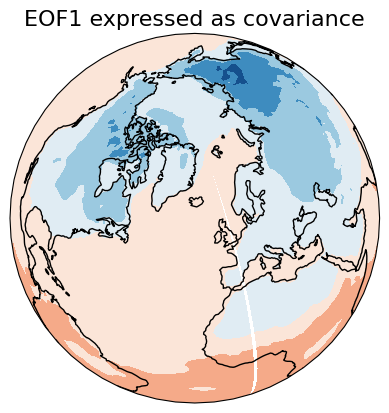

In [12]:

lons = tas['longitude']
lats = tas['latitude']
#clevs = np.linspace(-75, 75, 11)
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=60)
ax = plt.axes(projection=proj)
ax.set_global()
ax.coastlines()
ax.contourf(lons, lats, eofs_data1[0].squeeze(), #levels=clevs,
            cmap=plt.cm.RdBu_r, transform=ccrs.PlateCarree())
plt.title('EOF1 expressed as covariance', fontsize=16)

Text(0.5, 1.0, 'PC1')

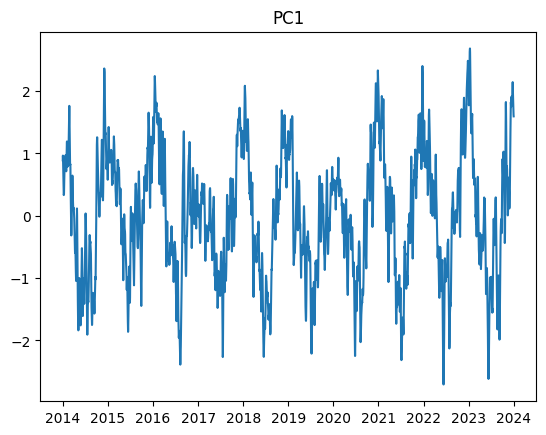

In [14]:
plt.plot(tas['time'][:-365],pcs[:,0])
plt.title('PC1')

In [132]:
reconstructed_data = msolver.reconstructedField(20)

In [133]:
reconstructed_data

[array([[[-12.620824 , -12.620824 , -12.620824 , ..., -12.620824 ,
          -12.620824 , -12.620824 ],
         [-11.878436 , -11.893078 , -11.908097 , ..., -11.825128 ,
          -11.842518 , -11.860298 ],
         [-11.630053 , -11.642052 , -11.653815 , ..., -11.576639 ,
          -11.594739 , -11.612504 ],
         ...,
         [ 15.004763 ,  15.043424 ,  15.081909 , ...,  14.803505 ,
           14.8703575,  14.937629 ],
         [ 15.072627 ,  15.09847  ,  15.124145 , ...,  15.009285 ,
           15.030375 ,  15.051545 ],
         [ 14.547804 ,  14.547804 ,  14.547804 , ...,  14.547804 ,
           14.547804 ,  14.547804 ]],
 
        [[-12.647578 , -12.647578 , -12.647578 , ..., -12.647578 ,
          -12.647578 , -12.647578 ],
         [-12.154724 , -12.175833 , -12.197344 , ..., -12.066868 ,
          -12.095762 , -12.12506  ],
         [-11.926576 , -11.970157 , -12.013631 , ..., -11.772695 ,
          -11.824039 , -11.875371 ],
         ...,
         [ 16.226479 ,  16.241789

## Test transformer using EOF1


In [16]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from src.model import simpleTransformerModel, TransformerModel
from src.prepare_data import TimeSeriesDataset, TimeSeriesDatasetWithCat
from src.train import train, evaluate
from src.plot import plot_predictions

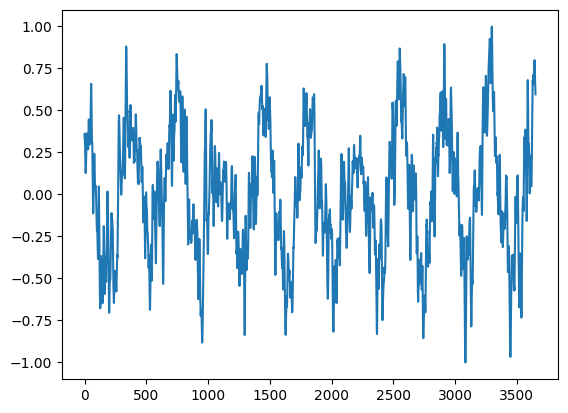

In [17]:
def my_norm(a):
    ratio = 2/(np.max(a)-np.min(a)) 
    #as you want your data to be between -1 and 1, everything should be scaled to 2, 
    #if your desired min and max are other values, replace 2 with your_max - your_min
    shift = (np.max(a)+np.min(a))/2 
    #now you need to shift the center to the middle, this is not the average of the values.
    return (a - shift)*ratio

data = my_norm(pcs[:,0])
plt.plot(data)

In [18]:
tas


<xarray.Dataset> Size: 467MB
Dimensions:    (longitude: 240, latitude: 121, time: 4018)
Coordinates:
  * longitude  (longitude) float64 2kB 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * latitude   (latitude) float64 968B 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * time       (time) datetime64[ns] 32kB 2014-01-01 2014-01-02 ... 2024-12-31
Data variables:
    tas        (time, latitude, longitude) float32 467MB 246.8 246.8 ... nan nan

In [19]:
dates = pd.DatetimeIndex((tas.variables['time']))
months = np.array(dates.month - 1)
for i in range(1,len(tas)):
    dates = pd.DatetimeIndex((tas.variables['time']))
    months = np.append(months,np.array(dates.month)- 1)
months = np.append(months,np.array(0))

In [20]:
months

array([ 0,  0,  0, ..., 11, 11,  0], shape=(4019,))

In [44]:
# Prepare dataset
seq_len = 28  # Length of sequence window for prediction
X = data[:-28].reshape(-1, 1) 
y = data[28:].reshape(-1, 1)  

# Split data
train_size = int(len(X) * 0.9)  # Use 80% of data for training
train_X, train_y = X[:train_size], y[:train_size]  # Training sets
test_X, test_y = X[train_size:], y[train_size:]   # Testing sets

# Categorical features
categories = 12
cat_features_train = months[:train_size]#np.random.randint(0, categories, train_size)
cat_features_test = months[train_size:]#np.random.randint(0, categories, len(test_y))

# Create datasets and data loaders
train_dataset = TimeSeriesDatasetWithCat(train_X, train_y, cat_features_train, seq_len)  # Training dataset with sequence windows
test_dataset = TimeSeriesDatasetWithCat(test_X, test_y, cat_features_test, seq_len)     # Testing dataset with sequence windows
batch_size = 32  # Number of samples in each mini-batch
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # Training loader with shuffling
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)  # Testing loader without shuffling


In [26]:
from torch.optim.lr_scheduler import ExponentialLR,ReduceLROnPlateau

In [45]:
# Configure hardware acceleration
# Set device to GPU if available, otherwise fall back to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize transformer model architecture
# Using 128 hidden dimensions for sequence processing
model = TransformerModel(input_dim=1, hidden_dim=64, output_dim=1,num_categories=categories)

# Move model to selected device (GPU/CPU) for computation
model.to(device)

# Initialize ADAM optimizer for parameter updates
# Learning rate of 0.001 provides stable convergence
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)#,betas=(0.95, 0.99), weight_decay=0.01)

optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
scheduler = ExponentialLR(optimizer,
                         gamma=0.95)  # multiply LR by gamma each epoch
# scheduler = ReduceLROnPlateau(optimizer, 
#                             mode='min',           # 'min' for loss, 'max' for accuracy
#                             factor=0.1,          # multiply LR by this factor
#                             patience=10,         # num epochs with no improvement
#                             threshold=1e-4,      # minimum change to qualify as improvement
#                             threshold_mode='abs') # absolute or relative threshold


# Set Mean Squared Error as loss function
# Appropriate for regression tasks where we predict continuous values
criterion = nn.MSELoss()

# Training configuration
epochs = 100  # Total number of training iterations

# Track best validation loss for model checkpointing
best_loss = float('inf')

# Main training loop
for epoch in range(epochs):
    # Train model on entire dataset for one epoch
    train_loss = train(model, device, train_loader, optimizer, criterion, scheduler)
    
    # Evaluate model every 10 epochs
    if epoch % 1 == 0:
        test_loss, predictions = evaluate(model, device, test_loader, criterion)
        
        # Print current training and validation metrics
        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')
        
        # Save best performing model based on validation loss
        #if test_loss < best_loss:
        #    torch.save(model.state_dict(), 'best_transformer_model.pth')
        #    best_loss = test_loss

Epoch 1, Train Loss: 0.2067, Test Loss: 0.1424
Epoch 2, Train Loss: 0.1079, Test Loss: 0.1541
Epoch 3, Train Loss: 0.0972, Test Loss: 0.1438
Epoch 4, Train Loss: 0.0874, Test Loss: 0.1426
Epoch 5, Train Loss: 0.0818, Test Loss: 0.1199
Epoch 6, Train Loss: 0.0792, Test Loss: 0.1227
Epoch 7, Train Loss: 0.0800, Test Loss: 0.1194
Epoch 8, Train Loss: 0.0746, Test Loss: 0.1206
Epoch 9, Train Loss: 0.0710, Test Loss: 0.1340
Epoch 10, Train Loss: 0.0714, Test Loss: 0.1238
Epoch 11, Train Loss: 0.0687, Test Loss: 0.1154
Epoch 12, Train Loss: 0.0696, Test Loss: 0.1272
Epoch 13, Train Loss: 0.0639, Test Loss: 0.1057
Epoch 14, Train Loss: 0.0622, Test Loss: 0.1225
Epoch 15, Train Loss: 0.0576, Test Loss: 0.1088
Epoch 16, Train Loss: 0.0585, Test Loss: 0.0996
Epoch 17, Train Loss: 0.0535, Test Loss: 0.0936
Epoch 18, Train Loss: 0.0520, Test Loss: 0.1061
Epoch 19, Train Loss: 0.0514, Test Loss: 0.1017
Epoch 20, Train Loss: 0.0478, Test Loss: 0.0945
Epoch 21, Train Loss: 0.0457, Test Loss: 0.0935
E

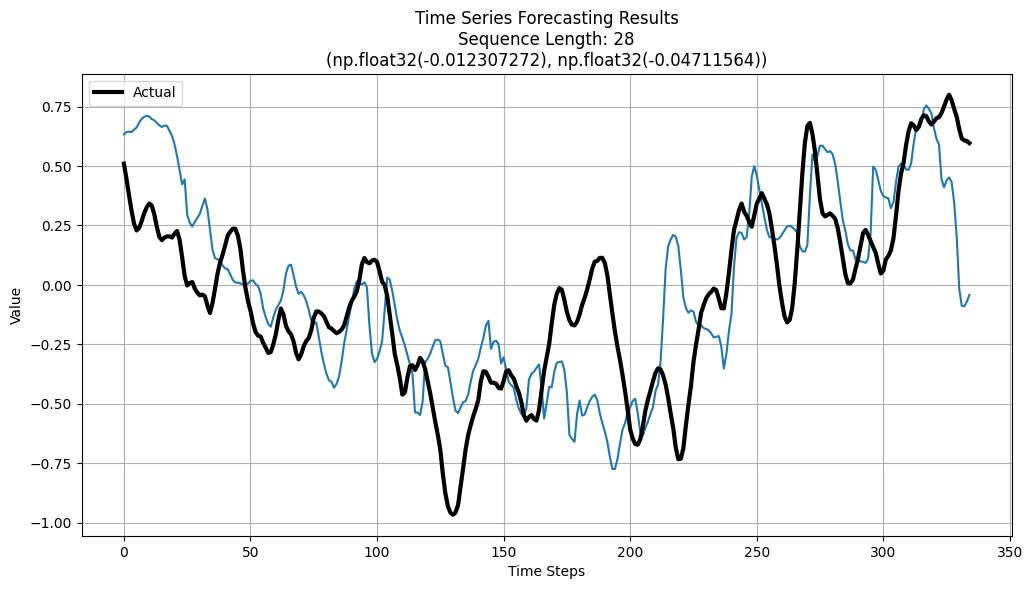

In [46]:
# Plot results
test_loss, predictions = evaluate(model, device, test_loader, criterion)
plot_predictions(data, predictions, seq_len)